In [76]:
import pandas as pd
import numpy as np

# Creating example data
data = {
    'Rooms': [2, 3, 4, 2, 3],
    'Bathroom': [1, 2, 3, 1, 2],
    'Distance': [10.0, 15.0, 12.0, 10.0, 18.0],
    'LandArea': [200.0, 150.0, 250.0, 220.0, 180.0],
    'Price': [500000.0, 600000.0, 750000.0, 520000.0, 620000.0]
}

df = pd.DataFrame(data)


So how are we getting these price estimations?

Using something called Random Forest Regression! 

Sounds complicated I know, but let's break it down!

You want to estimate the value of a house based on various features like its size, location, number of bedrooms, etc. Random Forest Regression is a technique that helps us make such predictions by combining the input from multiple "trees" - think of these as individual predictors.

Decision Trees:

A decision tree is like a flowchart where each node (or decision point) considers a feature (e.g. size of the house) and decides the next step based on whether its value is greater than or less than a certain value. It helps in making sequential decisions to arrive at a prediction.

A "Random Forest" is essentially a collection (or "forest") of many decision trees. Multiple trees are used to make the model robust and prevent it from becoming over-reliant on the training data, so it is able to make good predictions on new, unseen data. 

How it Works:

You have data like this.

In [77]:
df

,Rooms,Bathroom,Distance,LandArea,Price
0,2,1,10.0,200.0,500000.0
1,3,2,15.0,150.0,600000.0
2,4,3,12.0,250.0,750000.0
3,2,1,10.0,220.0,520000.0
4,3,2,18.0,180.0,620000.0


Training a Random Forest Regression Model:

Imagine you're teaching a group of students (the "trees" in our "forest") how to predict the price of a house. Each student will learn from a different set of books (data points) and will focus on different subjects (features like size, location, etc.). Here’s how the training process might look:

Selecting Data (Bootstrapping):

- Each student is given a different subset of houses (data points) to learn from.
- This subset is chosen randomly but with replacement, meaning a house can be chosen more than once.

Learning from Features:

- Each student doesn’t learn from all subjects (features) but focuses on a few selected randomly.
- For example, one might focus on size and location, while another might focus on the number of bedrooms and proximity to CBD.

Building Knowledge (Decision Trees):

- Each student creates their own flowchart (decision tree) to predict house prices based on what they’ve learned.
- They make decisions by asking questions like "Is the house larger than 1000 sq ft?" and navigate to the next step based on the answer.

Making Predictions with the Model:

Now, when someone wants to sell their house, you want to estimate its price before putting it out on the market:

Consulting Each Student (Tree):

- You ask each student (tree) in your group (forest) to predict the price based on what they’ve learned.
- Each student uses their own flowchart (decision tree) to come up with a price.

Averaging the Predictions:

- You collect all the price predictions from the students.
- The final predicted price of the house is the average of all their predictions.


In [78]:
from sklearn.model_selection import train_test_split

# Separating features from label
X = df.drop('Price', axis=1)
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


You can choose the number of students (the "trees") you want to help you estimate the price. 

In [79]:
# Add slider
n = int(input())

5


In [80]:
from sklearn.ensemble import RandomForestRegressor

# Training model
rf_model = RandomForestRegressor(n_estimators=n, max_depth=2, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, n_estimators=5, random_state=42)

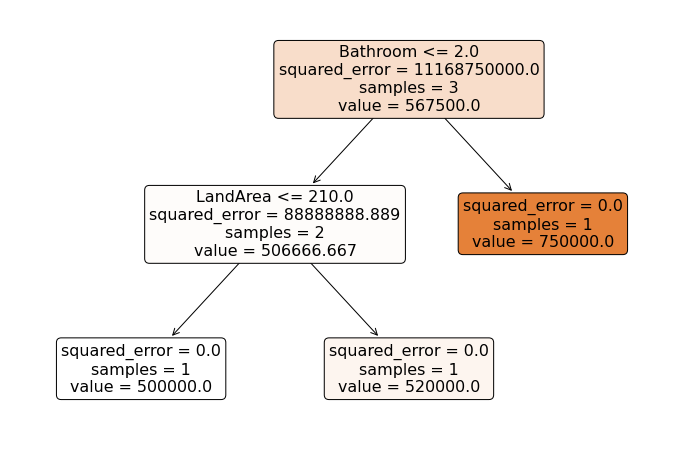

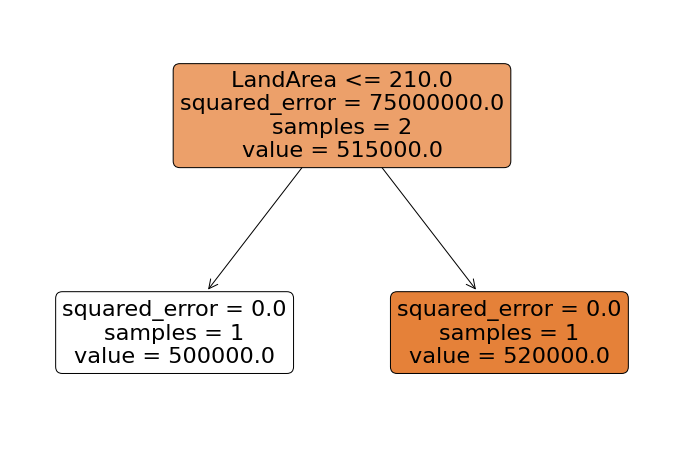

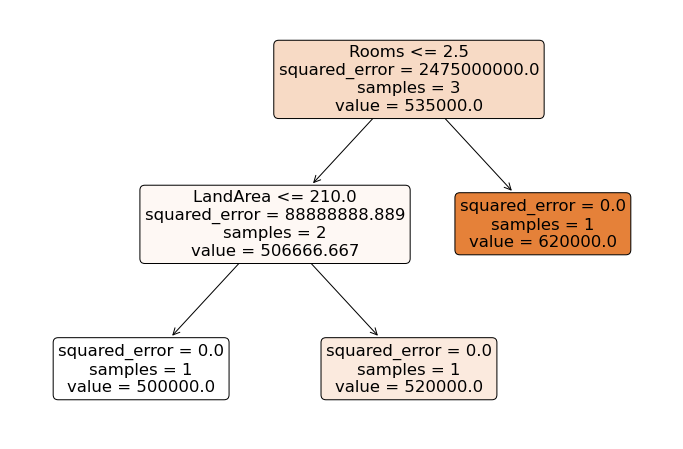

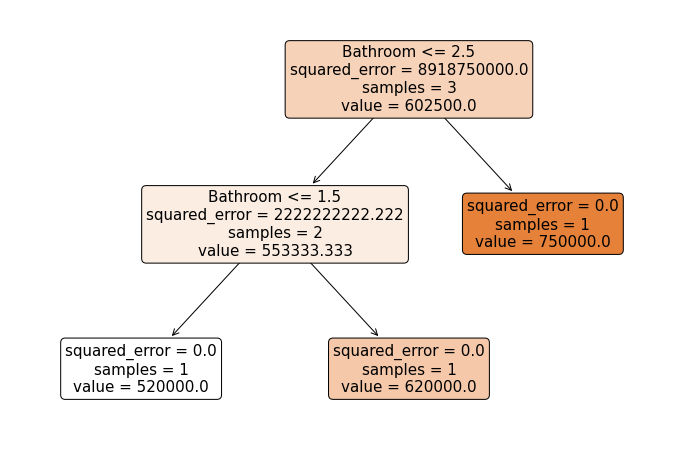

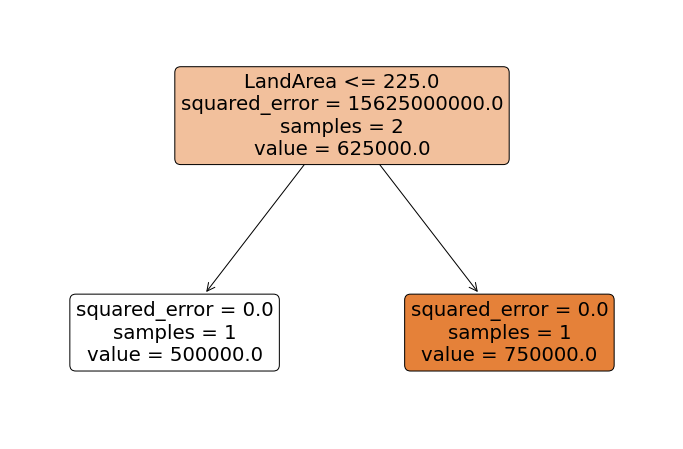

In [81]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualizing the trees
for i in range(n):
    # Select one tree from the forest
    tree = rf_model.estimators_[i]
    
    #Visualizing the tree
    plt.figure(figsize=(12, 8))
    plot_tree(tree, feature_names=X.columns.tolist(), filled=True, rounded=True)
    plt.show()


In [82]:
# User input to make the process more intercative
# Add slider
bedrooms = int(input())

5


In [83]:
# Add slider
bathrooms = int(input())

3


In [84]:
# Add slider
distance = float(input())

10


In [85]:
# Add slider
land_area = float(input())

250


In [86]:
# Creating dataframe for input data
new_data = pd.DataFrame({
    'Rooms': [bedrooms],
    'Bathroom': [bathrooms],
    'Distance': [distance],
    'LandArea': [land_area]
})

new_data

,Rooms,Bathroom,Distance,LandArea
0,5,3,10.0,250.0


In [87]:
# Predicting
predicted_price = rf_model.predict(new_data)

print(f"Expected Price: ${predicted_price[0]}")


Expected Price: $678000.0


Why Does This Work?

Wisdom of the Crowd: Just like a crowd of people tends to make better guesses than an individual, the average prediction of all trees (the crowd) is usually more accurate than a single tree.

Diverse Perspectives: Since each tree considers different data and features, the forest captures more perspectives, reducing the likelihood of errors.

Balancing Errors: Some trees may overestimate the price, while others may underestimate it. Averaging these predictions often leads to a more accurate estimate.